<a href="https://colab.research.google.com/github/MinseoMoon/aipython/blob/main/240531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as numpy
from sklearn import linear_model
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()

X=[[164],[179],[162],[170]]
y=[53,63,55,59]
regr.fit(X,y)

LinearRegression()

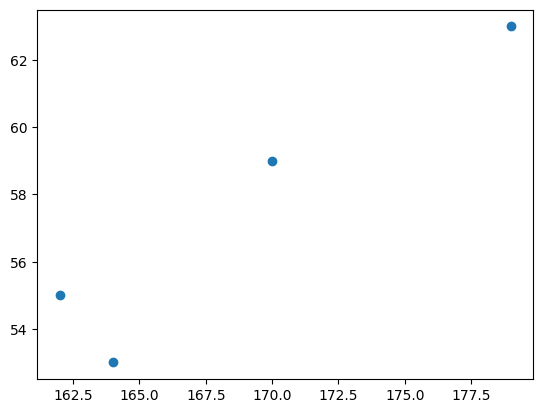

In [8]:
plt.scatter(X,y)
y_pred=regr.predict(X)

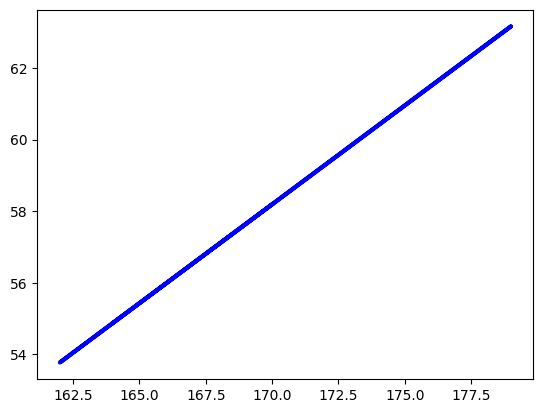

In [9]:
y_pred = regr.predict(X)
plt.plot(X,y_pred, color = 'blue', linewidth = 3)
plt.show()

In [2]:
score = regr.score(X,y)
print(score)

0.903203123105647


In [21]:
input_data=[[180],[185]]
result = regr.predict(input_data)
print(result)

[63.71244635 66.47353362]


재배면적과 수확량 선형 회귀 머신러닝 모델

In [13]:
#학습을 위한 데이터 준비
scale=[[2.1],[10],[3],[1],[3.5],[5],[8]]
amount=[64.9,292.6,85.9,30.92,110.5,163.4,163.4]

#선형 회귀 알고리즘 객체 생성
regr1 = linear_model.LinearRegression()
regr1.fit(scale,amount)

LinearRegression()

In [16]:
#상관도 분석
score1 = regr1.score(scale, amount)
print(score1)

0.9084260459892224


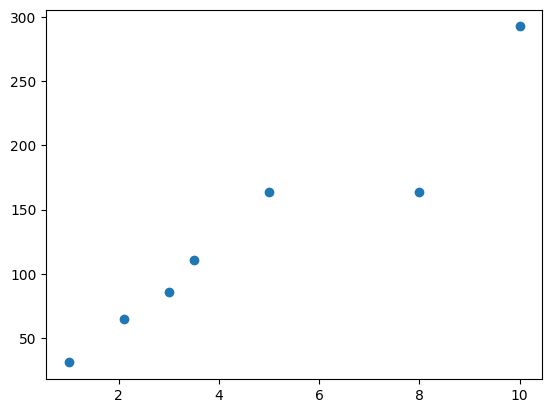

In [17]:
#산포도
plt.scatter(scale, amount)
plt.show()

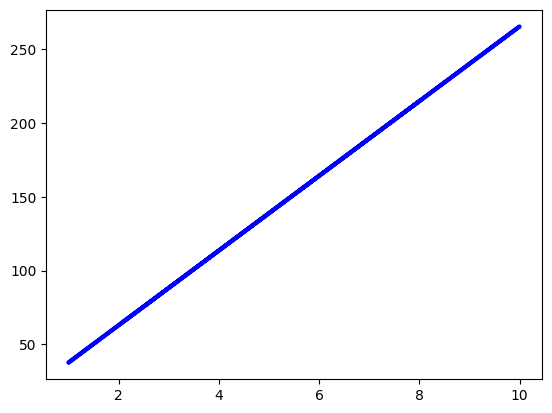

In [19]:
#선형 회귀 객체 모델의 학습을 수행하여 머신러닝 모델 생성
amount_pred = regr1.predict(scale)
plt.plot(scale,amount_pred, color = 'blue', linewidth = 3)
plt.show()

In [23]:
#예측값 생성
input_data1 =[[7],[12]]
result1 = regr1.predict(input_data1)
result1

array([189.55106566, 316.14785212])

부모의 키 데이터를 측정하여 자녀의 키가 속하는 그룹을 예측

In [28]:
parents_height = [[180,165],[175,160],[180,172],[165,160],[171,152]]
child_height = [3,2,2,1,1]
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(parents_height, child_height)
dt_pred = dt_model.predict([[175,153]])
dt_pred

array([2])

과목수와 공부시간으로 시험 점수 예측

In [30]:
import pandas as pd
std_df = pd.read_csv('Student_Marks.csv')
std_df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [37]:
std_df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [38]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [35]:
std_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [36]:
std_df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [40]:
std_df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


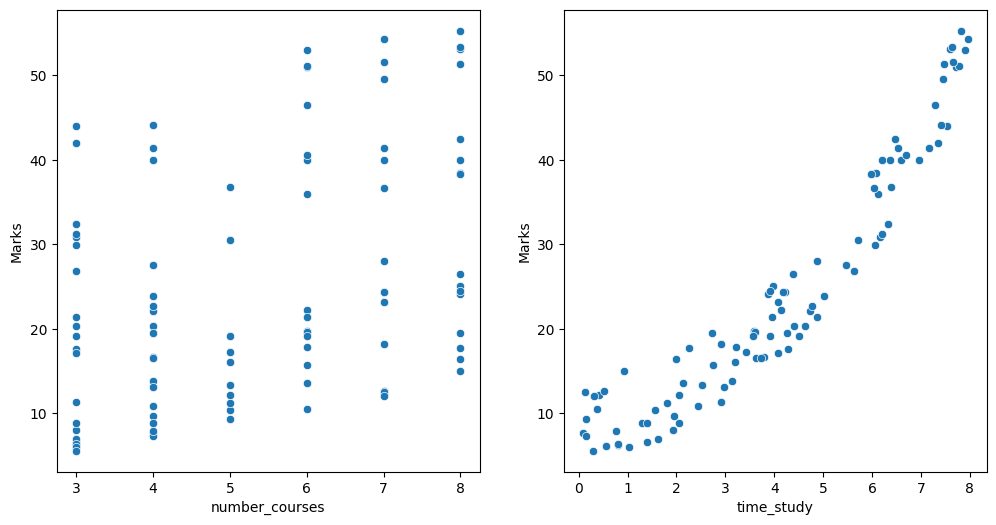

In [44]:
import seaborn as sns
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=std_df, x='number_courses', y='Marks', ax=ax[0])
sns.scatterplot(data=std_df, x='time_study', y='Marks', ax=ax[1])
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
x=std_df.drop('Marks', axis=1)
y=std_df['Marks']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)

LinearRegression()

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr_pred=lr_model.predict(X_test)

In [57]:
r2_score(lr_pred, Y_test)

0.9219617777759717

In [58]:
#예측한 것과 오차가 얼마나 발생하는지 알아보는 것 -> 점수(높으면 높을 수록 좋다, 다만 비교대상이 없으니까 제대로 알 수는 없다)
mean_squared_error(lr_pred, Y_test)

14.200726136374552

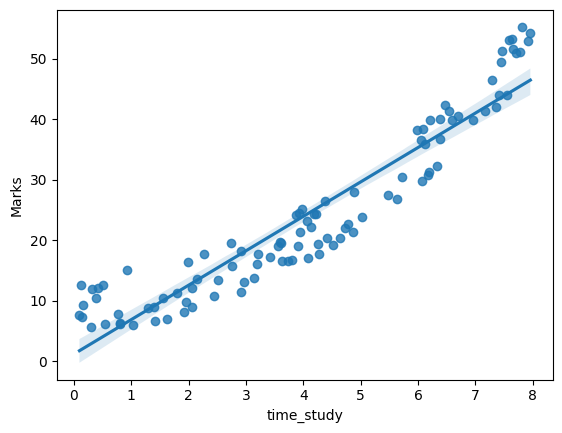

In [54]:
sns.regplot(x=std_df['time_study'],y=std_df['Marks'])
plt.show()